# 프리미어리그 클럽 통계 분석 프로젝트

이 프로젝트는 2022-23 시즌 프리미어리그 데이터를 수집하고, 팀별 경기 성적, 득점, 실점 등의 지표를 분석하여 인사이트를 도출하는 것을 목표로 합니다.

## 분석 절차
1. 데이터 수집 (웹 크롤링)
2. 데이터 전처리
3. 통계 분석 및 시각화
4. 결론 도출


## 1. 라이브러리 임포트 및 설정

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [196]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time, os, csv
import pandas as pd
import numpy as np
from selenium.webdriver.support.ui import WebDriverWait
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()))

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.81M/6.81M [00:00<00:00, 23.6MB/s]


In [32]:
driver.get('https://www.premierleague.com/stats/top/clubs/wins?se=489')

In [37]:
i1 = [1,2,3,4]
i2 = [1,2,4,5,7,8,9,10]
i3 = [1,2,3,4,5,6,8,9]
i4 = [1,2,3,5,6]

stat1 = ['wins', 'loses', 'goals', 'yellow_cards']
stat2 = ['shots', 'shots_on_target', 'headed_goals', 'penalties_scored', 
        'goals_from_inside_box', 'goals_from_outside_box', 'goals_from_counter_attack', 'offsides']
stat3 = ['clean_sheets', 'goals_conceded', 'saves', 'blocks', 'interceptions', 'tackles', 'clearences', 'headed_clearences'] 
stat4 = ['passes', 'through_balls', 'long_passes', 'crosses', 'corners']

stat_total = stat1 + stat2 + stat3 + stat4

In [5]:
n = 0
for i in i1:
    
    path = '//*[@id="mainContent"]/div[2]/div/div[2]/div[2]/div[1]/nav/ul/li[{}]'.format(i)
    driver.find_element(by=By.XPATH, value = path).click()
    driver.implicitly_wait(3)

    driver.execute_script("window.scrollTo(0, 250)")
    driver.implicitly_wait(3)
    button1 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/div[2]')
    driver.execute_script("arguments[0].click();", button1)
    time.sleep(1)
    button2 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/ul/li[2]')
    driver.execute_script("arguments[0].click();", button2)

    globals()['aaa'+'{}'.format(n)] = driver.find_elements(by = By.CSS_SELECTOR, value = '.statsTableContainer')
    time.sleep(1)

    arr = np.array(globals()['aaa'+'{}'.format(n)][0].text.split('\n')).reshape(20,3)
    colnames = ['rank', 'team_name', stat1[n]]

    globals()[stat1[n]] = pd.DataFrame(arr, columns = colnames).set_index('team_name')
    globals()[stat1[n]] = globals()[stat1[n]].drop(['rank'], axis=1)
    
    n += 1

n = 0
for i in i2:
    
    path = '//*[@id="mainContent"]/div[2]/div/div[2]/div[2]/div[2]/nav/ul/li[{}]'.format(i)
    driver.find_element(by=By.XPATH, value = path).click()
    driver.implicitly_wait(3)

    driver.execute_script("window.scrollTo(0, 250)")
    driver.implicitly_wait(3)
    button1 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/div[2]')
    driver.execute_script("arguments[0].click();", button1)
    time.sleep(1)
    button2 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/ul/li[2]')
    driver.execute_script("arguments[0].click();", button2)

    globals()['bbb'+'{}'.format(n)] = driver.find_elements(by = By.CSS_SELECTOR, value = '.statsTableContainer')
    time.sleep(2)

    if n == 3:
        arr = np.array(globals()['bbb'+'{}'.format(n)][0].text.split('\n')).reshape(19,3)
    else:
        arr = np.array(globals()['bbb'+'{}'.format(n)][0].text.split('\n')).reshape(20,3)
    colnames = ['rank', 'team_name', stat2[n]]

    globals()[stat2[n]] = pd.DataFrame(arr, columns = colnames).set_index('team_name')
    globals()[stat2[n]] = globals()[stat2[n]].drop(['rank'], axis=1)
    
    n += 1

n = 0
for i in i3:
    
    path = '//*[@id="mainContent"]/div[2]/div/div[2]/div[2]/div[3]/nav/ul/li[{}]'.format(i)
    driver.find_element(by=By.XPATH, value = path).click()
    driver.implicitly_wait(3)

    driver.execute_script("window.scrollTo(0, 250)")
    driver.implicitly_wait(3)
    button1 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/div[2]')
    driver.execute_script("arguments[0].click();", button1)
    time.sleep(1)
    button2 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/ul/li[2]')
    driver.execute_script("arguments[0].click();", button2)

    globals()['ccc'+'{}'.format(n)] = driver.find_elements(by = By.CSS_SELECTOR, value = '.statsTableContainer')
    time.sleep(2)

    arr = np.array(globals()['ccc'+'{}'.format(n)][0].text.split('\n')).reshape(20,3)
    colnames = ['rank', 'team_name', stat3[n]]

    globals()[stat3[n]] = pd.DataFrame(arr, columns = colnames).set_index('team_name')
    globals()[stat3[n]] = globals()[stat3[n]].drop(['rank'], axis=1)
    
    n += 1

n = 0
for i in i4:
    
    path = '//*[@id="mainContent"]/div[2]/div/div[2]/div[2]/div[4]/nav/ul/li[{}]'.format(i)
    driver.find_element(by=By.XPATH, value = path).click()
    driver.implicitly_wait(3)

    driver.execute_script("window.scrollTo(0, 250)")
    driver.implicitly_wait(3)
    button1 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/div[2]')
    driver.execute_script("arguments[0].click();", button1)
    time.sleep(1)
    button2 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/ul/li[2]')
    driver.execute_script("arguments[0].click();", button2)

    globals()['ddd'+'{}'.format(n)] = driver.find_elements(by = By.CSS_SELECTOR, value = '.statsTableContainer')
    time.sleep(3)

    arr = np.array(globals()['ddd'+'{}'.format(n)][0].text.split('\n')).reshape(20,3)
    colnames = ['rank', 'team_name', stat4[n]]

    globals()[stat4[n]] = pd.DataFrame(arr, columns = colnames).set_index('team_name')
    globals()[stat4[n]] = globals()[stat4[n]].drop(['rank'], axis=1)
    
    n += 1

driver.find_element(by=By.XPATH, value = '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/div[1]/div').click()
time.sleep(1)
driver.find_element(by=By.XPATH, value = '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/div[1]/ul/li[12]').click()
time.sleep(3)

driver.execute_script("window.scrollTo(0, 250)")
driver.implicitly_wait(3)
button1 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/div[2]')
driver.execute_script("arguments[0].click();", button1)
time.sleep(1)
button2 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/ul/li[2]')
driver.execute_script("arguments[0].click();", button2)
time.sleep(1)

big_chances_missed_crawl = driver.find_elements(by = By.CSS_SELECTOR, value = '.statsTableContainer')
time.sleep(1.5)

arr = np.array(big_chances_missed_crawl[0].text.split('\n')).reshape(20,3)
colnames = ['rank', 'team_name', 'big_chances_missed']

big_chances_missed = pd.DataFrame(arr, columns = colnames).set_index('team_name')
big_chances_missed = big_chances_missed.drop(['rank'], axis=1)

driver.find_element(by=By.XPATH, value = '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/div[1]/div').click()
driver.execute_script("window.scrollTo(0, 500)")
time.sleep(2)
driver.find_element(by=By.XPATH, value = '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/div[1]/ul/li[16]').click()
time.sleep(1)

driver.execute_script("window.scrollTo(0, 250)")
driver.implicitly_wait(3)
button1 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/div[2]')
driver.execute_script("arguments[0].click();", button1)
time.sleep(1)
button2 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div[1]/section/div[1]/ul/li[2]')
driver.execute_script("arguments[0].click();", button2)
time.sleep(1)

dispossessed_crawl = driver.find_elements(by = By.CSS_SELECTOR, value = '.statsTableContainer')
time.sleep(1.5)

arr = np.array(dispossessed_crawl[0].text.split('\n')).reshape(20,3)
colnames = ['rank', 'team_name', 'dispossessed']

dispossessed = pd.DataFrame(arr, columns = colnames).set_index('team_name')
dispossessed = dispossessed.drop(['rank'], axis=1)

In [6]:
record = pd.concat([wins, loses, goals, yellow_cards, shots, shots_on_target, headed_goals, penalties_scored, goals_from_inside_box,
                    goals_from_outside_box, goals_from_counter_attack, offsides, clean_sheets, goals_conceded, saves, blocks, interceptions,
                    tackles, clearences, headed_clearences, passes, through_balls, long_passes, crosses, corners], axis = 1)

record = record.apply(lambda x: x.str.strip(), axis = 1)
record = record.apply(lambda x: x.str.replace(',', ''), axis = 1)
record = record.fillna(0)

record = record.apply(pd.to_numeric)

date = '5.23'
os.chdir('C:/Users/gyoo4/OneDrive/바탕 화면/기록')
record.to_csv('record_{}.csv'.format(date), index = True, header = True)

In [34]:
#상대전적 구하기. 한 번만 실행하면 됨

driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/nav/div/ul/li[6]/a').click()
driver.implicitly_wait(3)

path1 = '//*[@id="mainContent"]/div[2]/div/div[2]/div/section[4]/div[1]/table/tbody/tr/td[1]'
path2 = '//*[@id="mainContent"]/div[2]/div/div[2]/div/section[4]/div[1]/table/tbody/tr/td[2]'
path3 = '//*[@id="mainContent"]/div[2]/div/div[2]/div/section[4]/div[1]/table/tbody/tr/td[3]'
        
list_against = []

for i in range(20):
    
    path_i = '//*[@id="mainContent"]/div[2]/div/div[2]/div/section[2]/div/div[1]/div[{}]'.format(i+1)
    
    driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div/section[1]/div[2]/div[1]/div[1]').click()
    driver.implicitly_wait(3)
    lteam = driver.find_element(By.XPATH, path_i)
    driver.execute_script("arguments[0].click();", lteam)
    driver.implicitly_wait(3)
    
    for j in range(i+1, 20):
        
        path_j = '//*[@id="mainContent"]/div[2]/div/div[2]/div/section[2]/div/div[1]/div[{}]'.format(j+1)
        
        driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div/div[2]/div/section[1]/div[2]/div[3]/div[1]').click()
        driver.implicitly_wait(3)
        rteam = driver.find_element(By.XPATH, path_j)
        driver.execute_script("arguments[0].click();", rteam)
        time.sleep(1)
        
        w = driver.find_element(By.XPATH, path1).text
        driver.implicitly_wait(3)
        d = driver.find_element(By.XPATH, path2).text.strip('Drawn: ')
        driver.implicitly_wait(3)
        l = driver.find_element(By.XPATH, path3).text
        driver.implicitly_wait(3)
        
        list_against.append(w)
        list_against.append(d)
        list_against.append(l)
        

team_str = ['Bournemouth', 'Arsenal', 'Aston Villa', 'Brentford', 'Brighton & Hove Albion', 
            'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United', 
            'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United',
            'Nottingham Forest', 'Southampton', 'Tottenham Hotspur', 'West Ham United', 
            'Wolverhampton Wanderers']
index = []
for i in range(20):
    for j in range(i+1,20):
        index.append(team_str[i] + '_vs_' + team_str[j])     

arr_against = np.array(list_against).reshape(int(len(list_against)/3.0),3)
df_against = pd.DataFrame(arr_against, columns = ['wins','draws','loses'])
df_against.index = index
df_against = df_against.astype('int')

df_against['winning_pecrentage'] = (df_against['wins'] + 0.5*df_against['draws']) / (df_against['wins'] + df_against['draws'] + df_against['loses']) 

os.chdir('C:/Users/gyoo4/OneDrive/바탕 화면/기록')
df_against.to_csv('상대전적.csv', index = True, header = True)

In [35]:
list0 = [0] * 400
against_arr = np.array(list0).reshape(20,20)
against_matrix = pd.DataFrame(against_arr, columns = team_str)

against_matrix = against_matrix.set_index(pd.Index(team_str))

wp = df_against['winning_pecrentage']

for i in range(19):
    for j in range(i, 20):
        
        if i == j:
            against_matrix.iloc[i,j] = 1
        else:
            against_matrix.iloc[i,j] = wp[int((-1) + i*(37-i)/2 + j)]
            against_matrix.iloc[j,i] = 1 - against_matrix.iloc[i,j]
            
against_matrix.iloc[19,19] = 1

os.chdir('C:/Users/gyoo4/OneDrive/바탕 화면/기록')
against_matrix.to_csv('상대전적_행렬.csv', index = True, header = True)
against_matrix

,Bournemouth,Arsenal,Aston Villa,Brentford,Brighton & Hove Albion,Chelsea,Crystal Palace,Everton,Fulham,Leeds United,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Nottingham Forest,Southampton,Tottenham Hotspur,West Ham United,Wolverhampton Wanderers
Bournemouth,1.000000,0.166667,0.666667,0.250,0.562500,0.375000,0.333333,0.500000,0.625000,0.500000,0.625000,0.208333,0.000000,0.208333,0.400000,0.750000,0.416667,0.250000,0.458333,0.333333
Arsenal,0.833333,1.000000,0.678571,0.625,0.458333,0.540323,0.714286,0.693548,0.812500,0.650000,0.735294,0.435484,0.538462,0.435484,0.705357,0.708333,0.677083,0.572581,0.750000,0.750000
Aston Villa,0.333333,0.321429,1.000000,0.500,0.750000,0.366071,0.500000,0.598214,0.583333,0.550000,0.428571,0.330357,0.260870,0.205357,0.384615,0.708333,0.511905,0.437500,0.489583,0.468750
Brentford,0.750000,0.375000,0.500000,1.000,0.375000,0.625000,0.500000,0.625000,0.500000,0.500000,0.250000,0.375000,0.500000,0.250000,0.125000,0.750000,0.750000,0.500000,1.000000,0.375000
Brighton & Hove Albion,0.437500,0.541667,0.250000,0.625,1.000000,0.333333,0.500000,0.416667,0.250000,0.750000,0.333333,0.291667,0.125000,0.416667,0.583333,0.250000,0.500000,0.291667,0.750000,0.600000
Chelsea,0.625000,0.459677,0.633929,0.375,0.666667,1.000000,0.821429,0.620968,0.765625,0.550000,0.676471,0.457627,0.586538,0.500000,0.633929,0.541667,0.656250,0.701613,0.629630,0.666667
Crystal Palace,0.666667,0.285714,0.500000,0.500,0.500000,0.178571,1.000000,0.375000,0.550000,0.500000,0.522727,0.267857,0.269231,0.214286,0.375000,0.250000,0.375000,0.267857,0.479167,0.550000
Everton,0.500000,0.306452,0.401786,0.375,0.583333,0.379032,0.625000,1.000000,0.609375,0.533333,0.558824,0.362903,0.442308,0.266129,0.491071,0.583333,0.562500,0.338710,0.638889,0.500000
Fulham,0.375000,0.187500,0.416667,0.500,0.750000,0.234375,0.450000,0.390625,1.000000,0.550000,0.650000,0.312500,0.283333,0.187500,0.483333,1.000000,0.527778,0.328125,0.269231,0.357143
Leeds United,0.500000,0.350000,0.450000,0.500,0.250000,0.450000,0.500000,0.466667,0.450000,1.000000,0.477273,0.316667,0.475000,0.283333,0.410714,0.458333,0.650000,0.466667,0.673077,0.562500


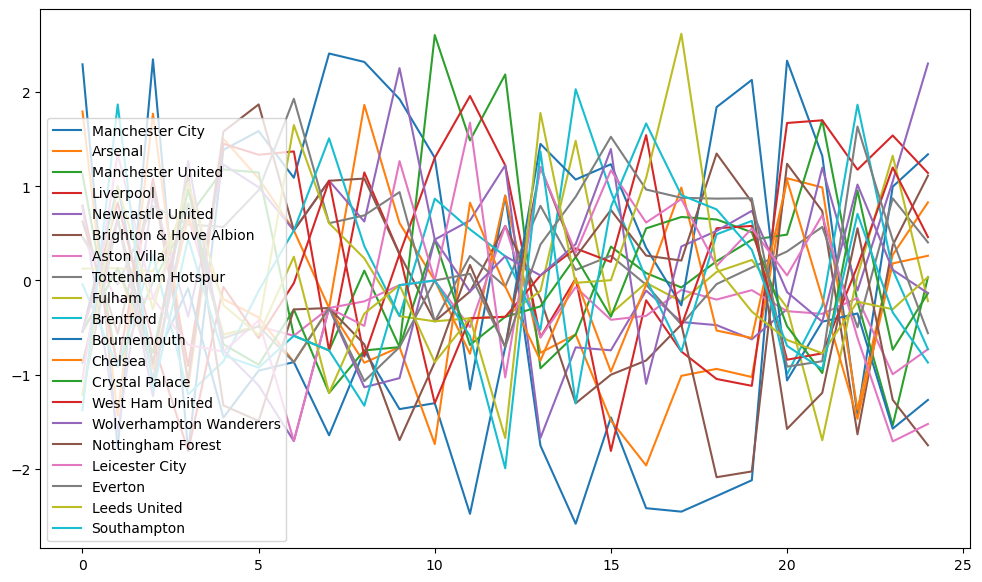

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler = scaler.fit_transform(record)
scaler = pd.DataFrame(scaler)

plt.figure(figsize = (12,7))

for i in range(20):
    plt.plot(scaler.iloc[i], label = record.index[i])
#plt.xticks('')
plt.legend(loc=0)

plt.show
plt.savefig('C:/Users/gyoo4/savefig_default5.png')

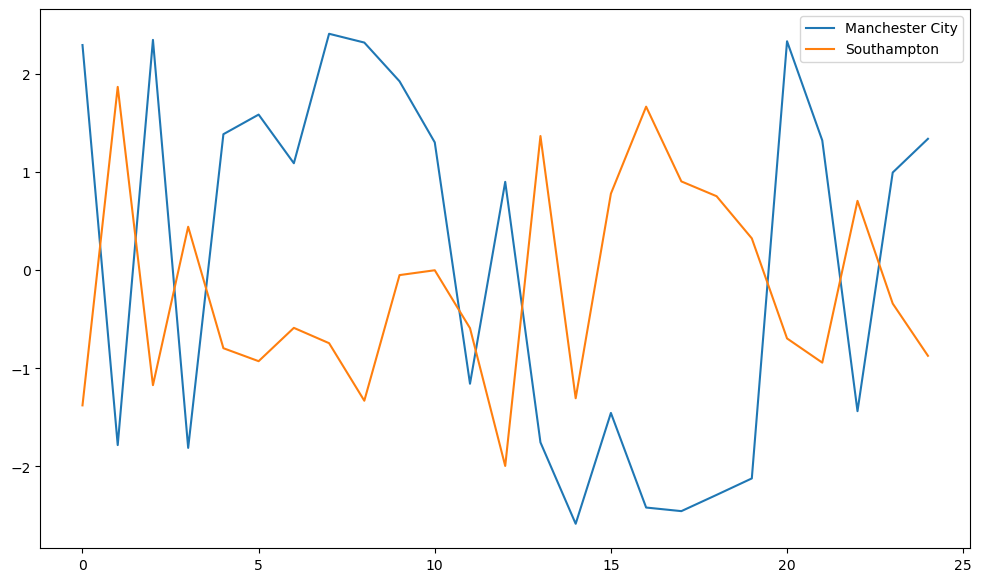

In [10]:
plt.figure(figsize = (12,7))

plt.plot(scaler.iloc[0], label = record.index[0])
plt.plot(scaler.iloc[19], label = record.index[19])
plt.legend(loc=0)

plt.show
plt.savefig('C:/Users/gyoo4/savefig_default6.png')

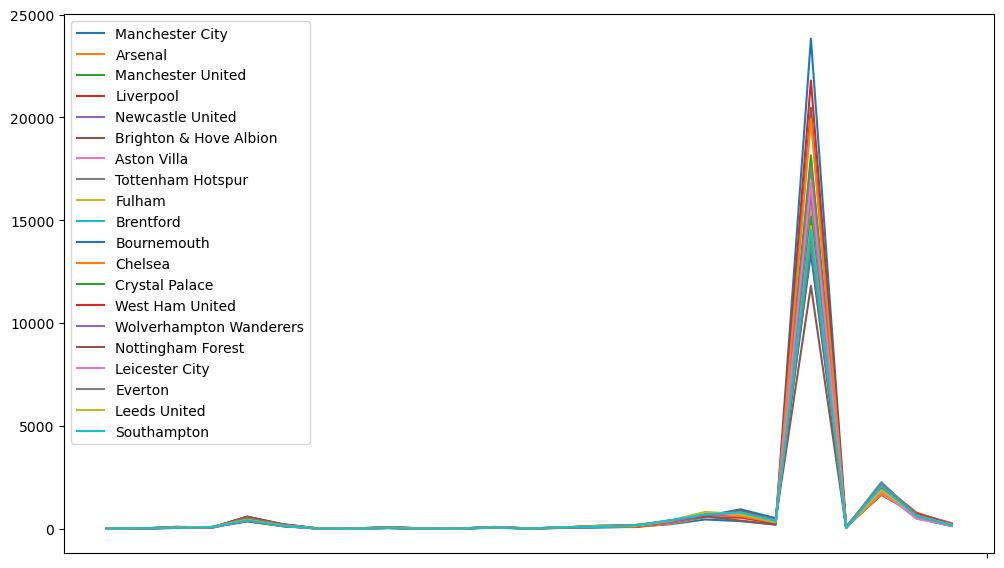

In [11]:
plt.figure(figsize = (12,7))

for i in range(20):
    plt.plot(record.iloc[i], label = record.index[i])
plt.xticks('')
plt.legend(loc=2)

plt.show
plt.savefig('C:/Users/gyoo4/savefig_default1.png')

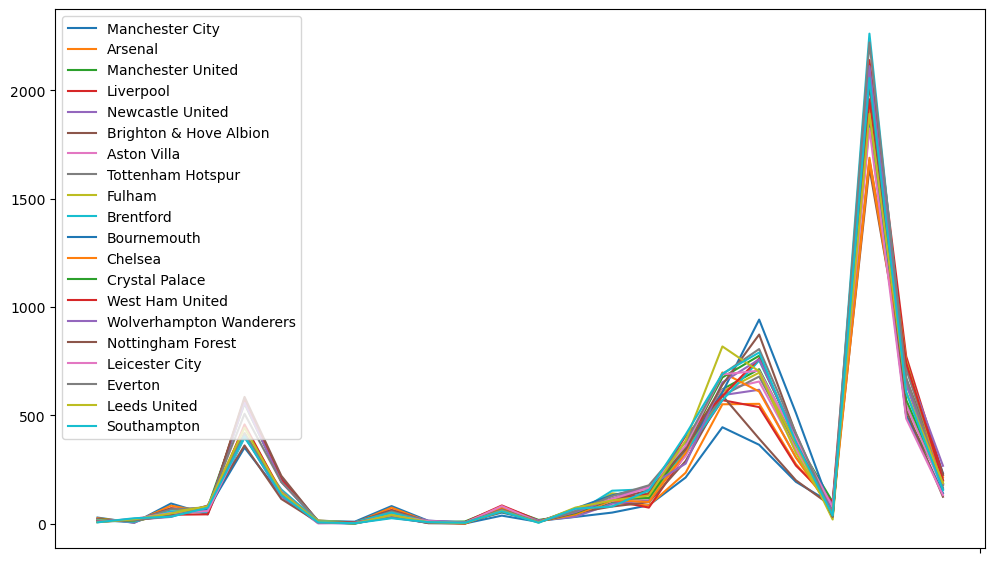

In [12]:
sub_record = record.drop(['passes'], axis=1)

plt.figure(figsize = (12,7))

for i in range(20):
    plt.plot(sub_record.iloc[i], label = record.index[i])
plt.xticks('')
plt.legend(loc=2)

plt.show
plt.savefig('C:/Users/gyoo4/savefig_default2.png')

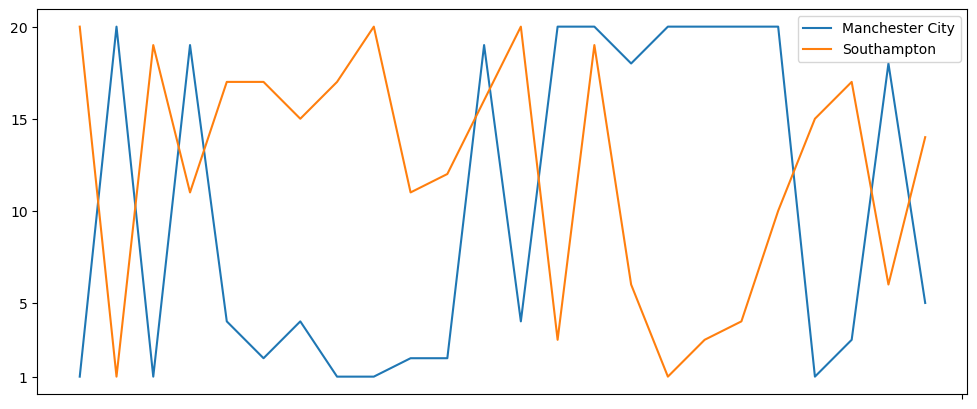

In [13]:
record_with_ranks = record.copy()

for i in range(record_with_ranks.shape[1]):
    record_with_ranks['ranks_by_{}'.format(stat_total[i])] = record_with_ranks.iloc[:,i].rank(method='first', ascending=False)


plt.figure(figsize = (12,5))

plt.plot(record_with_ranks.iloc[0,25:49], label = record_with_ranks.index[0])
plt.plot(record_with_ranks.iloc[19,25:49], label = record_with_ranks.index[19])

plt.xticks('')
plt.yticks([1,5,10,15,20])
plt.legend(loc=0)

plt.show
plt.savefig('C:/Users/gyoo4/savefig_default3.png')

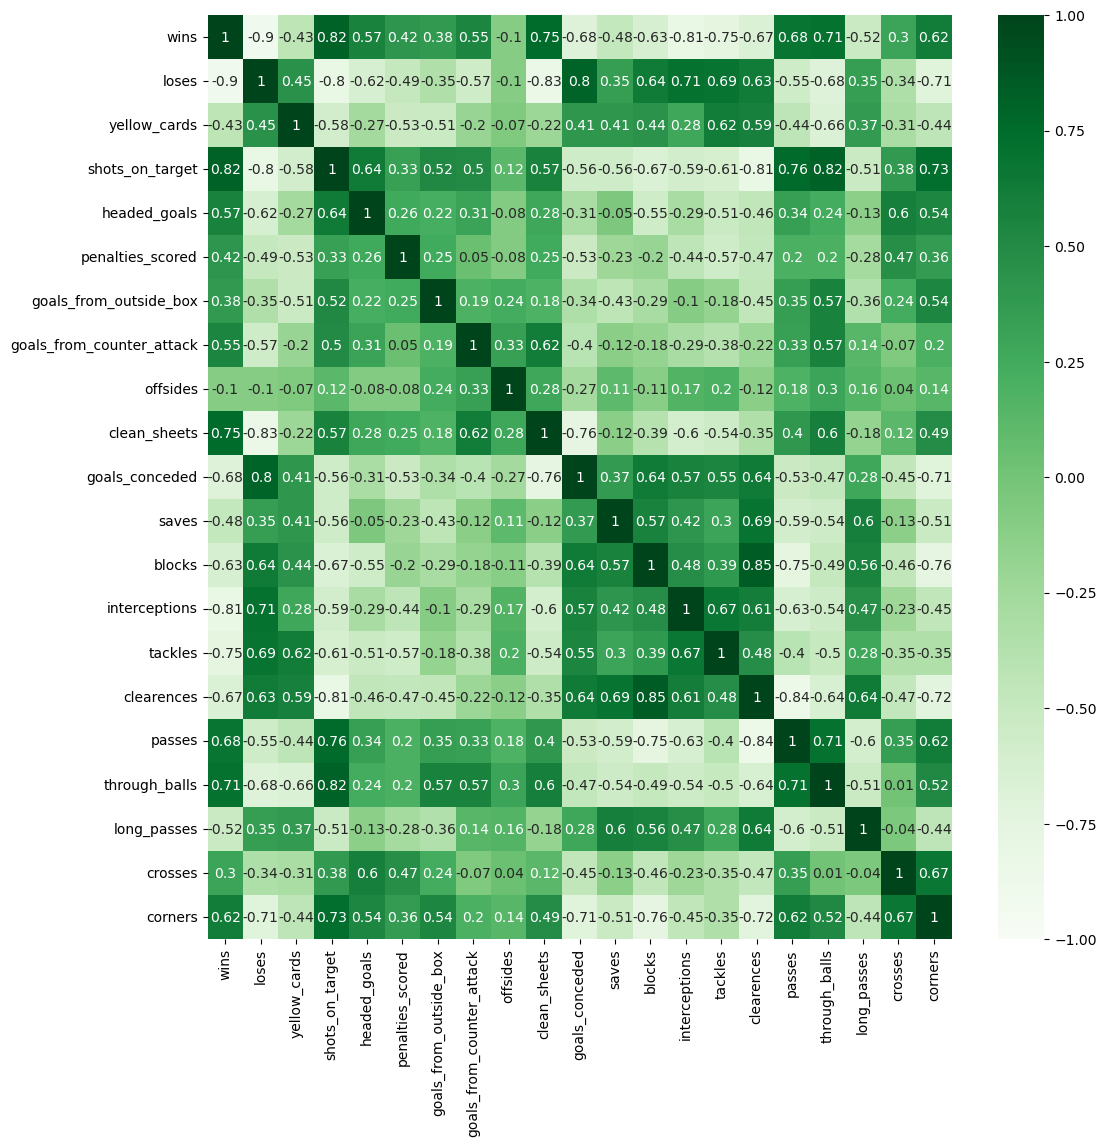

In [14]:
import seaborn as sb
record = pd.read_csv("C:/Users/gyoo4/OneDrive/바탕 화면/기록/record_4.28.csv", index_col = 'team_name')
record = record.drop(['goals','goals_from_inside_box','shots','headed_clearences'], axis=1)
plt.rcParams["figure.figsize"] = (12,12)
sb.heatmap(record.corr(method='pearson').round(decimals=2),
           annot = True,
           cmap = 'Greens', 
           vmin = -1, vmax = 1
          )

plt.savefig('C:/Users/gyoo4/savefig_default7.png')

In [27]:
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()))

driver.get('https://www.premierleague.com/results')

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.30M/6.30M [00:00<00:00, 11.5MB/s]


In [28]:
for i in range(6):
    button1 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[3]/div[1]/section/div[3]/div[2]')
    driver.execute_script("arguments[0].click();", button1)
    driver.implicitly_wait(3)
    button2 = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[3]/div[1]/section/div[3]/ul/li[{}]'.format(i+1))
    driver.execute_script("arguments[0].click();", button2)
    driver.implicitly_wait(3)

    scroll_location = driver.execute_script("return document.body.scrollHeight")

    while True:
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")  
        time.sleep(2)
        scroll_height = driver.execute_script("return document.body.scrollHeight")

        if scroll_location == scroll_height:
            break
	    
        else:
            scroll_location = driver.execute_script("return document.body.scrollHeight")

    time.sleep(2)

    path = '//*[@id="mainContent"]/div[3]/div[1]/div[2]/section'

    globals()['season'+'{}'.format(i)] = driver.find_element(By.XPATH, path).text.replace('\n', ',').split(',')


result22_23 = []

for i in range(len(season0)):
    if season0[i].count(' ') < 3:
        result22_23.append(season0[i])
    else:
        continue
arr22_23 = np.array(result22_23).reshape(int(len(result22_23)/3),3)

result21_22 = []

for i in range(len(season1)):
    if season1[i].count(' ') < 3:
        result21_22.append(season1[i])
    else:
        continue
arr21_22 = np.array(result21_22).reshape(380,3)

result20_21 = []

for i in range(len(season2)):
    if season2[i].count(' ') < 3:
        result20_21.append(season2[i])
    else:
        continue
arr20_21 = np.array(result20_21).reshape(380,3)
       
        
result19_20 = []

for i in range(len(season3)):
    if season3[i].count(' ') < 3:
        result19_20.append(season3[i])
    else:
        continue
arr19_20 = np.array(result19_20).reshape(380,3)

        
result18_19 = []

for i in range(len(season4)):
    if season4[i].count(' ') < 3:
        result18_19.append(season4[i])
    else:
        continue
arr18_19 = np.array(result18_19).reshape(380,3)

        
result17_18 = []

for i in range(len(season5)):
    if season5[i].count(' ') < 3:
        result17_18.append(season5[i])
    else:
        continue
arr17_18 = np.array(result17_18).reshape(380,3)


colnames = ['Home_Team', 'Score', 'Away_Team']

df22_23 = pd.DataFrame(arr22_23, columns = colnames)
df21_22 = pd.DataFrame(arr21_22, columns = colnames)
df20_21 = pd.DataFrame(arr20_21, columns = colnames)
df19_20 = pd.DataFrame(arr19_20, columns = colnames)
df18_19 = pd.DataFrame(arr18_19, columns = colnames)
df17_18 = pd.DataFrame(arr17_18, columns = colnames)

home_result = pd.concat([df22_23, df21_22, df20_21, df19_20, df18_19, df17_18], axis=0).reset_index()

result = []

for i in range(len(home_result)):
    if home_result['Score'][i].split('-')[0] > home_result['Score'][i].split('-')[1]:
        result.append('win')
    elif home_result['Score'][i].split('-')[0] == home_result['Score'][i].split('-')[1]:
        result.append('draw')
    else:
        result.append('lose')
        
home_result['result'] = result
home_result = home_result.drop('index', axis=1)

home_result['Home_Team'] = home_result['Home_Team'].replace('Man City', 'Manchester City').replace('Man Utd','Manchester United').replace('Spurs', 'Tottenham Hotspur').replace('Wolves', 'Wolverhampton Wanderers').replace('Leicester', 'Leicester City').replace('Leeds', 'Leeds United').replace('Brighton', 'Brighton & Hove Albion').replace('West Ham', 'West Ham United').replace('Newcastle', 'Newcastle United').replace("Nott'm Forest", 'Nottingham Forest')
home_result['Away_Team'] = home_result['Away_Team'].replace('Man City', 'Manchester City').replace('Man Utd','Manchester United').replace('Spurs', 'Tottenham Hotspur').replace('Wolves', 'Wolverhampton Wanderers').replace('Leicester', 'Leicester City').replace('Leeds', 'Leeds United').replace('Brighton', 'Brighton & Hove Albion').replace('West Ham', 'West Ham United').replace('Newcastle', 'Newcastle United').replace("Nott'm Forest", 'Nottingham Forest')


w1 = []
for i in range(20):
    w1.append((list(home_result[home_result['Home_Team'] == list(record.index)[i]]['result']).count('win') + 0.5*list(home_result[home_result['Home_Team'] == list(record.index)[i]]['result']).count('draw'))  / len(home_result[home_result['Home_Team'] == list(record.index)[i]]['result']))

w2 = []
for i in range(20):
    w2.append((list(home_result[home_result['Away_Team'] == list(record.index)[i]]['result']).count('lose') + 0.5*list(home_result[home_result['Home_Team'] == list(record.index)[i]]['result']).count('draw')) / len(home_result[home_result['Away_Team'] == list(record.index)[i]]['result']))

home = pd.DataFrame(w1, index = list(record.index))
away = pd.DataFrame(w2, index = list(record.index))

home_weight = pd.concat([home, away], axis=1)
home_weight.columns = ['home', 'away']
home_weight['weight'] = home_weight['home'] - home_weight['away']
home_weight

,home,away,weight
Manchester City,0.864035,0.741228,0.122807
Arsenal,0.736842,0.491228,0.245614
Manchester United,0.723684,0.583333,0.140351
Liverpool,0.842105,0.666667,0.175439
Newcastle United,0.543860,0.412281,0.131579
Brighton & Hove Albion,0.500000,0.429825,0.070175
Aston Villa,0.513158,0.407895,0.105263
Tottenham Hotspur,0.692982,0.482456,0.210526
Fulham,0.385965,0.298246,0.087719
Brentford,0.578947,0.421053,0.157895


In [4]:
import pandas as pd 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [190]:
record = pd.read_csv("C:/Users/gyoo4/OneDrive/바탕 화면/기록/record_5.23.csv", index_col = 'team_name')
record = record.drop(['goals', 'shots', 'goals_from_inside_box', 'headed_clearences'], axis = 1)
var_name = pd.Series(record.columns)
scaler = StandardScaler()

scaler = scaler.fit_transform(record)
record_scaler = pd.DataFrame(scaler)

variable_cluster = KMeans(n_clusters=2, algorithm='auto')
variable_cluster.fit(record_scaler.T)

variable_KMeans = pd.concat([var_name, pd.Series(variable_cluster.labels_)], axis = 1)
variable_KMeans.columns = ('variables', 'cluster')

variable_KMeans

C:\Users\gyoo4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gyoo4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\gyoo4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,variables,cluster
0,wins,0
1,loses,1
2,yellow_cards,1
3,shots_on_target,0
4,headed_goals,0
5,penalties_scored,0
6,goals_from_outside_box,0
7,goals_from_counter_attack,0
8,offsides,0
9,clean_sheets,0


In [2]:
team_name = pd.Series(record.index)

team_clusters = sch.linkage(y = record_scaler, method='ward', metric='euclidean') #ward연결법은 비슷한 크기의 cluster로 묶어줌

plt.figure( figsize = (25, 10) )
sch.dendrogram(team_clusters)
plt.show()
plt.savefig('C:/Users/gyoo4/savefig_default8.png')

team_hierarchy = pd.concat([team_name, pd.DataFrame(sch.fcluster(team_clusters, 3, criterion='maxclust'))], axis = 1)
team_hierarchy.columns = ('team', 'cluster')
team_hierarchy

NameError: name 'pd' is not defined

In [1]:
team_cluster1 = list(team_hierarchy[team_hierarchy['cluster']==1]['team'])
team_cluster2 = list(team_hierarchy[team_hierarchy['cluster']==2]['team'])
team_cluster3 = list(team_hierarchy[team_hierarchy['cluster']==3]['team'])
team_cluster2

NameError: name 'team_hierarchy' is not defined

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

In [249]:
data_lr = pd.read_csv("C:/Users/gyoo4/OneDrive/바탕 화면/기록/result.csv")
data_lr['result'] = data_lr['result'].astype('str')
data_team1 = pd.DataFrame()
data_team2 = pd.DataFrame()
data_team3 = pd.DataFrame()

for i in range(len(data_lr)):
    
    if str(data_lr['home_team'][i]) in team_cluster1:
        data_team1 = pd.concat([data_team1, pd.DataFrame(data_lr.iloc[i]).T], ignore_index=True)
    elif str(data_lr['home_team'][i]) in team_cluster2:
        data_team2 = pd.concat([data_team2, pd.DataFrame(data_lr.iloc[i]).T], ignore_index=True)
    elif str(data_lr['home_team'][i]) in team_cluster3:
        data_team3 = pd.concat([data_team3, pd.DataFrame(data_lr.iloc[i]).T], ignore_index=True)

for i in range(len(data_lr)):
    
    if str(data_lr['away_team'][i]) in team_cluster1:
        data_team1 = pd.concat([data_team1, pd.DataFrame(data_lr.iloc[i]).T], ignore_index=True)
    elif str(data_lr['away_team'][i]) in team_cluster2:
        data_team2 = pd.concat([data_team2, pd.DataFrame(data_lr.iloc[i]).T], ignore_index=True)
    elif str(data_lr['away_team'][i]) in team_cluster3:
        data_team3 = pd.concat([data_team3, pd.DataFrame(data_lr.iloc[i]).T], ignore_index=True)

data_team1.drop_duplicates(inplace=True, ignore_index=True)
data_team2.drop_duplicates(inplace=True, ignore_index=True)
data_team3.drop_duplicates(inplace=True, ignore_index=True)

data_team1 = data_team1.drop(['loses','wins','long_passes','through_balls','home_team','away_team'], axis=1)
data_team2 = data_team2.drop(['wins','loses','headed_goals','through_balls','home_team','away_team'], axis=1)
data_team3 = data_team3.drop(['loses','wins','home_team','away_team'], axis=1)

data_team1 = data_team1.astype('float')
data_team2 = data_team2.astype('float')
data_team3 = data_team3.astype('float')

data_team1['result'] = data_team1['result'].astype('category')
data_team2['result'] = data_team2['result'].astype('category')
data_team3['result'] = data_team3['result'].astype('category')

print(len(data_team1), len(data_team2), len(data_team3))

54 37 72


In [245]:
features1 = data_team1.iloc[:,1:]
labels1 = data_team1['result']

features2 = data_team2.iloc[:,1:]
labels2 = data_team2['result']

features3 = data_team3.iloc[:,1:]
labels3 = data_team3['result']

train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features1, labels1, test_size = 0.2)
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features2, labels2, test_size = 0.2)
train_features3, test_features3, train_labels3, test_labels3 = train_test_split(features3, labels3, test_size = 0.2)

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif1 = pd.DataFrame()
data1 = data_team1.drop(['loses','wins','through_balls','long_passes','result'], axis=1)

vif1["VIF Factor"] = [variance_inflation_factor(data1.values, i) for i in range(data1.shape[1])]
vif1["features"] = data1.columns 

vif1 = vif1.sort_values(by="VIF Factor", ascending=False)
vif1 = vif1.reset_index().drop(columns='index')
vif1

,VIF Factor,features
0,8.752557,clearences
1,8.341957,tackles
2,8.189202,blocks
3,7.444309,corners
4,7.212147,yellow_cards
5,7.107403,clean_sheets
6,6.480410,interceptions
7,5.432618,headed_goals
8,5.239265,passes
9,4.871306,shots_on_target


In [239]:
vif2 = pd.DataFrame()
data2 = data_team2.drop(['wins','loses','headed_goals','through_balls','result'], axis=1)

vif2["VIF Factor"] = [variance_inflation_factor(data2.values, i) for i in range(data2.shape[1])]
vif2["features"] = data2.columns 

vif2 = vif2.sort_values(by="VIF Factor", ascending=False)
vif2 = vif2.reset_index().drop(columns='index')
vif2

,VIF Factor,features
0,7.691625,clean_sheets
1,6.781527,blocks
2,6.374064,clearences
3,5.568997,corners
4,5.277306,saves
5,5.105845,long_passes
6,5.082991,goals_conceded
7,4.936969,crosses
8,4.506835,penalties_scored
9,4.453106,passes


In [241]:
vif3 = pd.DataFrame()
data3 = data_team3.drop(['loses','wins','result'], axis=1) 

vif3["VIF Factor"] = [variance_inflation_factor(data3.values, i) for i in range(data3.shape[1])]
vif3["features"] = data3.columns 

vif3 = vif3.sort_values(by="VIF Factor", ascending=False)
vif3 = vif3.reset_index().drop(columns='index')
vif3

,VIF Factor,features
0,8.581805,through_balls
1,7.752234,blocks
2,7.625908,shots_on_target
3,7.340869,clearences
4,6.443409,interceptions
5,6.289405,clean_sheets
6,5.853615,long_passes
7,5.380941,crosses
8,4.997464,yellow_cards
9,4.513214,headed_goals


In [246]:
rf_clf = RandomForestClassifier(random_state=65)

parameter = {'max_depth' : [1,5,10,20], 'max_features' : [5,10,15], 'n_estimators' : [10,30,50,100]}

grid_rf_clf = GridSearchCV(rf_clf, param_grid=parameter, cv=5, refit=True)
grid_rf_clf.fit(train_features1, train_labels1)

scores_df = pd.DataFrame(grid_rf_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').iloc[0:15]
grid_rf_clf.best_params_

{'max_depth': 5, 'max_features': 10, 'n_estimators': 100}

In [247]:
rf_clf_best = RandomForestClassifier(random_state=65, max_depth=5, max_features=10, n_estimators=100)
rf_clf_best.fit(features1, labels1)

importance = rf_clf_best.feature_importances_
feature = features1.columns
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

,feature,importances
0,tackles,0.120743
1,corners,0.117767
2,goals_from_outside_box,0.110845
3,clean_sheets,0.097233
4,clearences,0.079125
5,interceptions,0.065616
6,shots_on_target,0.052240
7,headed_goals,0.049866
8,relative_record,0.046290
9,goals_from_counter_attack,0.037343


In [363]:
data_team1_selected = data_team1[['result','tackles','clean_sheets','clearences', 'corners','goals_from_outside_box']]

features1_selected = data_team1_selected.iloc[:,1:]
labels1_selected = data_team1_selected['result']

train_features1_selected, test_features1_selected, train_labels1_selected, test_labels1_selected = train_test_split(features1_selected, labels1_selected, test_size = 0.2)

In [257]:
logistic_clf = LogisticRegression(random_state = 65, multi_class='auto', class_weight='balanced')

parameter = {'solver' : ['newton-cg', 'lbfgs','sag', 'saga'], 'C' : [0.001, 0.005, 0.01, 0.1], 'max_iter' : [100, 500]} #C값이 클수록 훈련을 복잡하게 하고 규제가 약해짐

grid_logistic_clf = GridSearchCV(logistic_clf, param_grid=parameter, cv=5, refit=True, error_score='raise')
grid_logistic_clf.fit(train_features1_selected, train_labels1_selected)

scores_df = pd.DataFrame(grid_logistic_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
grid_logistic_clf.best_params_

{'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}

In [258]:
lgbm_clf = lgb.LGBMClassifier(random_state=65)

parameter = {'max_depth':[1,5,10],
                'num_leaves':[3,4,5,6,7],
                'learning_rate':[0.001,0.01,0.05,0.1],
                'colsample_bytree':[0.5,0.75,1.0],
                'subsample':[0.5,0.75,1.0],
                'n_estimators':[10,30,50,100]}

grid_lgbm_clf = GridSearchCV(lgbm_clf, param_grid=parameter, cv=5, refit=True, error_score='raise')
grid_lgbm_clf.fit(train_features1_selected, train_labels1_selected)

scores_df = pd.DataFrame(grid_lgbm_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').iloc[0:15]
grid_lgbm_clf.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.001,
 'max_depth': 1,
 'n_estimators': 10,
 'num_leaves': 3,
 'subsample': 0.5}

In [259]:
svm_clf =svm.SVC(random_state = 65)

parameter = [{'kernel':['linear'], 'C':[1,100,10,0.1,0.01,0.001]}, 
            {'kernel':['poly','rbf','sigmoid'], 'C':[1,100,10,0.1,0.01,0.001], 'gamma':['auto',1000,100,10,1,0.1,0.01,0.001,0.0001]}]

grid_svm_clf = GridSearchCV(svm_clf, param_grid=parameter, cv=5, refit=True, error_score='raise')
grid_svm_clf.fit(train_features1_selected, train_labels1_selected)

scores_df = pd.DataFrame(grid_svm_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
grid_svm_clf.best_params_

{'C': 1, 'gamma': 10, 'kernel': 'sigmoid'}

In [260]:
rf_clf = RandomForestClassifier(random_state=65)

parameter = {'max_depth' : [1,5,10,20], 'n_estimators' : [10,30,50,100]}

grid_rf_clf = GridSearchCV(rf_clf, param_grid=parameter, cv=5, refit=True, error_score='raise')
grid_rf_clf.fit(train_features1_selected, train_labels1_selected)

scores_df = pd.DataFrame(grid_rf_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').iloc[0:15]
grid_rf_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [279]:
rf_accuracy = [0] * 100
svm_accuracy = [0] * 100
logistic_accuracy = [0] * 100
lgbm_accuracy = [0] * 100

for i in range(100):

    train_features_selected1, test_features_selected1, train_labels_selected1, test_labels_selected1 = train_test_split(features1_selected, labels1_selected, test_size = 0.2)

    rf_clf_selected = RandomForestClassifier(random_state=65, max_depth=5, n_estimators=30)
    rf_clf_selected.fit(train_features_selected1, train_labels_selected1)

    rf_pred = rf_clf_selected.predict(test_features_selected1)

    rf_accuracy[i] = accuracy_score(test_labels_selected1, rf_pred)

    svm_clf_selected =svm.SVC(random_state = 65, C=1, gamma= 10, kernel='sigmoid')
    svm_clf_selected.fit(train_features_selected1, train_labels_selected1)

    svm_pred = svm_clf_selected.predict(test_features_selected1)

    svm_accuracy[i] = accuracy_score(test_labels_selected1, svm_pred)

    logistic_clf_selected = LogisticRegression(random_state = 65, multi_class='auto', class_weight='balanced', C= 0.1, max_iter= 100, solver= 'newton-cg')
    logistic_clf_selected.fit(train_features_selected1, train_labels_selected1)

    logistic_pred = logistic_clf_selected.predict(test_features_selected1)

    logistic_accuracy[i] = accuracy_score(test_labels_selected1, logistic_pred)
    
    lgbm_clf_selected = lgb.LGBMClassifier(random_state=65, colsample_bytree = 0.5, learning_rate= 0.001, max_depth= 1, n_estimators= 10, num_leaves=3, subsample= 0.5)
    lgbm_clf_selected.fit(train_features_selected1, train_labels_selected1)
    
    lgbm_pred = lgbm_clf_selected.predict(test_features_selected1)
    
    lgbm_accuracy[i] = accuracy_score(test_labels_selected1, lgbm_pred)
    
mean_rf_accuracy = sum(rf_accuracy) / len(rf_accuracy)
mean_svm_accuracy = sum(svm_accuracy) / len(svm_accuracy)
mean_logistic_accuracy = sum(logistic_accuracy) / len(logistic_accuracy)
mean_lgbm_accuracy = sum(lgbm_accuracy) / len(lgbm_accuracy)

print('Random Forest accuracy          : ', mean_rf_accuracy)
print('Support Vector Machine accuracy : ', mean_svm_accuracy)
print('Logistic Regression accuracy    : ', mean_logistic_accuracy)
print('Light GBM accuracy              : ', mean_lgbm_accuracy)

Random Forest accuracy          :  0.6445454545454542
Support Vector Machine accuracy :  0.6209090909090905
Logistic Regression accuracy    :  0.6509090909090908
Light GBM accuracy              :  0.5245454545454548


In [251]:
rf_clf = RandomForestClassifier(random_state=65)

parameter = {'max_depth' : [1,5,10,20], 'n_estimators' : [10,30,50,100], 'max_features' : [5,10,15]}

grid_rf_clf = GridSearchCV(rf_clf, param_grid=parameter, cv=4, refit=True, error_score='raise')
grid_rf_clf.fit(train_features2, train_labels2)

scores_df = pd.DataFrame(grid_rf_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').iloc[0:15]
grid_rf_clf.best_params_

C:\Users\gyoo4\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


{'max_depth': 1, 'max_features': 15, 'n_estimators': 30}

In [252]:
rf_clf_best = RandomForestClassifier(random_state=65, max_depth=1, max_features=15, n_estimators=30)
rf_clf_best.fit(features2, labels2)

importance = rf_clf_best.feature_importances_
feature = features2.columns
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

,feature,importances
0,interceptions,0.300000
1,relative_record,0.233333
2,clearences,0.100000
3,goals_from_outside_box,0.100000
4,goals_from_counter_attack,0.066667
5,clean_sheets,0.066667
6,tackles,0.066667
7,goals_conceded,0.033333
8,long_passes,0.033333
9,corners,0.000000


In [254]:
data_team2_selected = data_team2[['result','interceptions','relative_record','clearences','goals_from_outside_box']]

features2_selected = data_team2_selected.iloc[:,1:]
labels2_selected = data_team2_selected['result']

train_features2_selected, test_features2_selected, train_labels2_selected, test_labels2_selected = train_test_split(features2_selected, labels2_selected, test_size = 0.2)

In [261]:
logistic_clf = LogisticRegression(random_state = 65, multi_class='multinomial', class_weight='balanced')

parameter = {'solver' : ['newton-cg', 'lbfgs', 'saga'], 'C' : [0.001, 0.005, 0.01, 0.1], 'max_iter' : [100, 500, 1000, 5000]} #C값이 클수록 훈련을 복잡하게 하고 규제가 약해짐

grid_logistic_clf = GridSearchCV(logistic_clf, param_grid=parameter, cv=4, refit=True, error_score='raise')
grid_logistic_clf.fit(train_features2_selected, train_labels2_selected)

scores_df = pd.DataFrame(grid_logistic_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
grid_logistic_clf.best_params_

{'C': 0.001, 'max_iter': 100, 'solver': 'saga'}

In [262]:
rf_clf = RandomForestClassifier(random_state=65)

parameter = {'max_depth' : [1,5,10,20], 'n_estimators' : [10,30,50,100]}

grid_rf_clf = GridSearchCV(rf_clf, param_grid=parameter, cv=4, refit=True, error_score='raise')
grid_rf_clf.fit(train_features2_selected, train_labels2_selected)

scores_df = pd.DataFrame(grid_rf_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').iloc[0:15]
grid_rf_clf.best_params_

{'max_depth': 1, 'n_estimators': 50}

In [263]:
svm_clf =svm.SVC(random_state = 65)

parameter = [{'kernel':['linear'], 'C':[1,100,10,0.1,0.01,0.001]}, 
            {'kernel':['poly','rbf','sigmoid'], 'C':[1,100,10,0.1,0.01,0.001], 'gamma':['auto',1000,100,10,1,0.1,0.01,0.001,0.0001]}]

grid_svm_clf = GridSearchCV(svm_clf, param_grid=parameter, cv=4, refit=True, error_score='raise')
grid_svm_clf.fit(train_features2_selected, train_labels2_selected)

scores_df = pd.DataFrame(grid_svm_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
grid_svm_clf.best_params_

{'C': 100, 'gamma': 10, 'kernel': 'sigmoid'}

In [264]:
lgbm_clf = lgb.LGBMClassifier(random_state=65)

parameter = {'max_depth':[1,5,10],
                'num_leaves':[3,4,5,6,7],
                'learning_rate':[0.001,0.01,0.05,0.1],
                'colsample_bytree':[0.5,0.75,1.0],
                'subsample':[0.5,0.75,1.0],
                'n_estimators':[10,30,50,100]}

grid_lgbm_clf = GridSearchCV(lgbm_clf, param_grid=parameter, cv=4, refit=True, error_score='raise')
grid_lgbm_clf.fit(train_features2_selected, train_labels2_selected)

scores_df = pd.DataFrame(grid_lgbm_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').iloc[0:15]
grid_lgbm_clf.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.001,
 'max_depth': 1,
 'n_estimators': 10,
 'num_leaves': 3,
 'subsample': 0.5}

In [270]:
rf_accuracy = [0] * 100
svm_accuracy = [0] * 100
logistic_accuracy = [0] * 100
lgbm_accuracy = [0] * 100

for i in range(100):

    train_features_selected2, test_features_selected2, train_labels_selected2, test_labels_selected2 = train_test_split(features2_selected, labels2_selected, test_size = 0.2)

    rf_clf_selected = RandomForestClassifier(random_state=65, max_depth=1, n_estimators=50)
    rf_clf_selected.fit(train_features_selected2, train_labels_selected2)

    rf_pred = rf_clf_selected.predict(test_features_selected2)

    rf_accuracy[i] = accuracy_score(test_labels_selected2, rf_pred)

    svm_clf_selected =svm.SVC(random_state = 65, C=100, gamma= 10, kernel='sigmoid')
    svm_clf_selected.fit(train_features_selected2, train_labels_selected2)

    svm_pred = svm_clf_selected.predict(test_features_selected2)

    svm_accuracy[i] = accuracy_score(test_labels_selected2, svm_pred)

    logistic_clf_selected = LogisticRegression(random_state = 65, multi_class='auto', class_weight='balanced', C= 0.001, max_iter= 100, solver= 'saga')
    logistic_clf_selected.fit(train_features_selected2, train_labels_selected2)

    logistic_pred = logistic_clf_selected.predict(test_features_selected2)

    logistic_accuracy[i] = accuracy_score(test_labels_selected2, logistic_pred)
    
    lgbm_clf_selected = lgb.LGBMClassifier(random_state=65, objective = 'multiclass', colsample_bytree = 0.5, learning_rate= 0.001, max_depth= 1, n_estimators= 10, num_leaves=3, subsample= 0.5)
    lgbm_clf_selected.fit(train_features_selected2, train_labels_selected2)
    
    lgbm_pred = lgbm_clf_selected.predict(test_features_selected2)
    
    lgbm_accuracy[i] = accuracy_score(test_labels_selected2, lgbm_pred)
    
mean_rf_accuracy = sum(rf_accuracy) / len(rf_accuracy)
mean_svm_accuracy = sum(svm_accuracy) / len(svm_accuracy)
mean_logistic_accuracy = sum(logistic_accuracy) / len(logistic_accuracy)
mean_lgbm_accuracy = sum(lgbm_accuracy) / len(lgbm_accuracy)

print('Random Forest accuracy          : ', mean_rf_accuracy)
print('Support Vector Machine accuracy : ', mean_svm_accuracy)
print('Logistic Regression accuracy    : ', mean_logistic_accuracy)
print('Light GBM accuracy              : ', mean_lgbm_accuracy)

Random Forest accuracy          :  0.60625
Support Vector Machine accuracy :  0.5125
Logistic Regression accuracy    :  0.465
Light GBM accuracy              :  0.5375


In [253]:
rf_clf = RandomForestClassifier(random_state=65)

parameter = {'max_depth' : [1,5,10,20], 'n_estimators' : [10,30,50,100], 'max_features' : [5,10,15,20]}

grid_rf_clf = GridSearchCV(rf_clf, param_grid=parameter, cv=5, refit=True, error_score='raise')
grid_rf_clf.fit(train_features3, train_labels3)

scores_df = pd.DataFrame(grid_rf_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').iloc[0:15]
grid_rf_clf.best_params_

{'max_depth': 1, 'max_features': 5, 'n_estimators': 100}

In [255]:
rf_clf_best = RandomForestClassifier(random_state=65, max_depth=1, max_features=5, n_estimators=100)
rf_clf_best.fit(features3, labels3)

importance = rf_clf_best.feature_importances_
feature = features3.columns
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

,feature,importances
0,interceptions,0.19
1,tackles,0.17
2,headed_goals,0.16
3,goals_from_counter_attack,0.07
4,clean_sheets,0.07
5,relative_record,0.06
6,penalties_scored,0.06
7,corners,0.06
8,clearences,0.04
9,shots_on_target,0.04


In [256]:
data_team3_selected = data_team3[['result','headed_goals','interceptions', 'tackles','clean_sheets','goals_from_counter_attack','relative_record','penalties_scored']]

features3_selected = data_team3_selected.iloc[:,1:]
labels3_selected = data_team3_selected['result']

train_features3_selected, test_features3_selected, train_labels3_selected, test_labels3_selected = train_test_split(features3_selected, labels3_selected, test_size = 0.2)

In [265]:
logistic_clf = LogisticRegression(random_state = 65, multi_class='multinomial', class_weight='balanced')

parameter = {'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'], 'C' : [0.001, 0.005, 0.01, 0.1], 'max_iter' : [100, 500]} #C값이 클수록 훈련을 복잡하게 하고 규제가 약해짐

grid_logistic_clf = GridSearchCV(logistic_clf, param_grid=parameter, cv=5, refit=True, error_score='raise')
grid_logistic_clf.fit(train_features3_selected, train_labels3_selected)

scores_df = pd.DataFrame(grid_logistic_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
grid_logistic_clf.best_params_

{'C': 0.001, 'max_iter': 100, 'solver': 'newton-cg'}

In [266]:
svm_clf =svm.SVC(random_state = 65)

parameter = [{'kernel':['linear'], 'C':[1,100,10,0.1,0.01,0.001]}, 
            {'kernel':['poly','rbf','sigmoid'], 'C':[1,100,10,0.1,0.01,0.001], 'gamma':['auto',1000,100,10,1,0.1,0.01,0.001,0.0001]}]

grid_svm_clf = GridSearchCV(svm_clf, param_grid=parameter, cv=5, refit=True, error_score='raise')
grid_svm_clf.fit(train_features3_selected, train_labels3_selected)

scores_df = pd.DataFrame(grid_svm_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score')
grid_svm_clf.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}

In [267]:
rf_clf = RandomForestClassifier(random_state=65)

parameter = {'max_depth' : [1,5,10,20], 'n_estimators' : [10,30,50,100]}

grid_rf_clf = GridSearchCV(rf_clf, param_grid=parameter, cv=5, refit=True, error_score='raise')
grid_rf_clf.fit(train_features3_selected, train_labels3_selected)

scores_df = pd.DataFrame(grid_rf_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').iloc[0:15]
grid_rf_clf.best_params_

{'max_depth': 1, 'n_estimators': 10}

In [268]:
lgbm_clf = lgb.LGBMClassifier(random_state=65)

parameter = {'max_depth':[1,5,10],
                'learning_rate':[0.001,0.01,0.05,0.1],
                'colsample_bytree':[0.5,0.75,1.0],
                'subsample':[0.5,0.75,1.0],
                'n_estimators':[10,30,50,100]}

grid_lgbm_clf = GridSearchCV(lgbm_clf, param_grid=parameter, cv=5, refit=True, error_score='raise')
grid_lgbm_clf.fit(train_features3_selected, train_labels3_selected)

scores_df = pd.DataFrame(grid_lgbm_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').iloc[0:15]
grid_lgbm_clf.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 1,
 'n_estimators': 10,
 'subsample': 0.5}

In [283]:
rf_accuracy = [0] * 100
svm_accuracy = [0] * 100
logistic_accuracy = [0] * 100
lgbm_accuracy = [0] * 100

for i in range(100):

    train_features_selected3, test_features_selected3, train_labels_selected3, test_labels_selected3 = train_test_split(features3_selected, labels3_selected, test_size = 0.2)

    rf_clf_selected = RandomForestClassifier(random_state=65, max_depth=1, n_estimators=10)
    rf_clf_selected.fit(train_features_selected3, train_labels_selected3)

    rf_pred = rf_clf_selected.predict(test_features_selected3)

    rf_accuracy[i] = accuracy_score(test_labels_selected3, rf_pred)

    svm_clf_selected = svm.SVC(random_state = 65, C=1, gamma= 'auto', kernel='sigmoid')
    svm_clf_selected.fit(train_features_selected3, train_labels_selected3)

    svm_pred = svm_clf_selected.predict(test_features_selected3)

    svm_accuracy[i] = accuracy_score(test_labels_selected3, svm_pred)

    logistic_clf_selected = LogisticRegression(random_state = 65, multi_class='auto', class_weight='balanced', C= 0.001, max_iter= 100, solver= 'newton-cg')
    logistic_clf_selected.fit(train_features_selected3, train_labels_selected3)

    logistic_pred = logistic_clf_selected.predict(test_features_selected3)

    logistic_accuracy[i] = accuracy_score(test_labels_selected3, logistic_pred)
    
    lgbm_clf_selected = lgb.LGBMClassifier(random_state=65, colsample_bytree = 0.5, learning_rate= 0.1, max_depth= 1, n_estimators= 10, subsample= 0.5)
    lgbm_clf_selected.fit(train_features_selected3, train_labels_selected3)
    
    lgbm_pred = lgbm_clf_selected.predict(test_features_selected3)
    
    lgbm_accuracy[i] = accuracy_score(test_labels_selected3, lgbm_pred)
    
mean_rf_accuracy = sum(rf_accuracy) / len(rf_accuracy)
mean_svm_accuracy = sum(svm_accuracy) / len(svm_accuracy)
mean_logistic_accuracy = sum(logistic_accuracy) / len(logistic_accuracy)
mean_lgbm_accuracy = sum(lgbm_accuracy) / len(lgbm_accuracy)

print('Random Forest accuracy          : ', mean_rf_accuracy)
print('Support Vector Machine accuracy : ', mean_svm_accuracy)
print('Logistic Regression accuracy    : ', mean_logistic_accuracy)
print('Light GBM accuracy              : ', mean_lgbm_accuracy)

Random Forest accuracy          :  0.5826666666666668
Support Vector Machine accuracy :  0.5886666666666669
Logistic Regression accuracy    :  0.5513333333333335
Light GBM accuracy              :  0.5479999999999999


In [284]:
scaler = StandardScaler()
record5_23 = pd.read_csv("C:/Users/gyoo4/OneDrive/바탕 화면/기록/record_5.23.csv", index_col = 'team_name').drop(['goals','shots', 'goals_from_inside_box', 'headed_clearences'], axis = 1)
index = list(record5_23.index)
column = list(record5_23.columns)
scaler5_23 = scaler.fit_transform(record5_23)
record5_23 = pd.DataFrame(scaler5_23, index=index, columns = column)

game1 = [0] * 22; game2 = [0] * 22; game3 = [0] * 22; game4 = [0] * 22; game5 = [0] * 22
game6 = [0] * 22; game7 = [0] * 22; game8 = [0] * 22; game9 = [0] * 22; game10 = [0] * 22

for i in range(21):
    
    if variable_KMeans['cluster'][i] == 0:
        game1[i] = (1 + home_weight.loc['Arsenal']['weight']) * record5_23.loc['Arsenal'].to_list()[i] - record5_23.loc['Wolverhampton Wanderers'].to_list()[i]
        game2[i] = (1 + home_weight.loc['Aston Villa']['weight']) * record5_23.loc['Aston Villa'].to_list()[i] - record5_23.loc['Brighton & Hove Albion'].to_list()[i]
        game3[i] = (1 + home_weight.loc['Brentford']['weight']) * record5_23.loc['Brentford'].to_list()[i] - record5_23.loc['Manchester City'].to_list()[i]
        game4[i] = (1 + home_weight.loc['Chelsea']['weight']) * record5_23.loc['Chelsea'].to_list()[i] - record5_23.loc['Newcastle United'].to_list()[i]
        game5[i] = (1 + home_weight.loc['Crystal Palace']['weight']) * record5_23.loc['Crystal Palace'].to_list()[i] - record5_23.loc['Nottingham Forest'].to_list()[i]
        game6[i] = (1 + home_weight.loc['Everton']['weight']) * record5_23.loc['Everton'].to_list()[i] - record5_23.loc['Bournemouth'].to_list()[i]
        game7[i] = (1 + home_weight.loc['Leeds United']['weight']) * record5_23.loc['Leeds United'].to_list()[i] - record5_23.loc['Tottenham Hotspur'].to_list()[i]
        game8[i] = (1 + home_weight.loc['Leicester City']['weight']) * record5_23.loc['Leicester City'].to_list()[i] - record5_23.loc['West Ham United'].to_list()[i]
        game9[i] = (1 + home_weight.loc['Manchester United']['weight']) * record5_23.loc['Manchester United'].to_list()[i] - record5_23.loc['Fulham'].to_list()[i]
        game10[i] = (1 + home_weight.loc['Southampton']['weight']) * record5_23.loc['Southampton'].to_list()[i] - record5_23.loc['Liverpool'].to_list()[i]
    else:
        game1[i] = (1 - home_weight.loc['Arsenal']['weight']) * record5_23.loc['Arsenal'].to_list()[i] - record5_23.loc['Wolverhampton Wanderers'].to_list()[i]
        game2[i] = (1 - home_weight.loc['Aston Villa']['weight']) * record5_23.loc['Aston Villa'].to_list()[i] - record5_23.loc['Brighton & Hove Albion'].to_list()[i]
        game3[i] = (1 - home_weight.loc['Brentford']['weight']) * record5_23.loc['Brentford'].to_list()[i] - record5_23.loc['Manchester City'].to_list()[i]
        game4[i] = (1 - home_weight.loc['Chelsea']['weight']) * record5_23.loc['Chelsea'].to_list()[i] - record5_23.loc['Newcastle United'].to_list()[i]
        game5[i] = (1 - home_weight.loc['Crystal Palace']['weight']) * record5_23.loc['Crystal Palace'].to_list()[i] - record5_23.loc['Nottingham Forest'].to_list()[i]
        game6[i] = (1 - home_weight.loc['Everton']['weight']) * record5_23.loc['Everton'].to_list()[i] - record5_23.loc['Bournemouth'].to_list()[i]
        game7[i] = (1 - home_weight.loc['Leeds United']['weight']) * record5_23.loc['Leeds United'].to_list()[i] - record5_23.loc['Tottenham Hotspur'].to_list()[i]
        game8[i] = (1 - home_weight.loc['Leicester City']['weight']) * record5_23.loc['Leicester City'].to_list()[i] - record5_23.loc['West Ham United'].to_list()[i]
        game9[i] = (1 - home_weight.loc['Manchester United']['weight']) * record5_23.loc['Manchester United'].to_list()[i] - record5_23.loc['Fulham'].to_list()[i]
        game10[i] = (1 - home_weight.loc['Southampton']['weight']) * record5_23.loc['Southampton'].to_list()[i] - record5_23.loc['Liverpool'].to_list()[i]
        
game1[21] = against_matrix.loc['Arsenal','Wolverhampton Wanderers']
game2[21] = against_matrix.loc['Aston Villa','Brighton & Hove Albion']
game3[21] = against_matrix.loc['Brentford','Manchester City']
game4[21] = against_matrix.loc['Chelsea','Newcastle United']
game5[21] = against_matrix.loc['Crystal Palace','Nottingham Forest']
game6[21] = against_matrix.loc['Everton','Bournemouth']
game7[21] = against_matrix.loc['Leeds United','Tottenham Hotspur']
game8[21] = against_matrix.loc['Leicester City','West Ham United']
game9[21] = against_matrix.loc['Manchester United','Fulham']
game10[21] = against_matrix.loc['Southampton','Liverpool']

game1.insert(0, 'Arsenal'); game2.insert(0, 'Aston Villa'); game3.insert(0, 'Brentford'); game4.insert(0, 'Chelsea'); game5.insert(0, 'Crystal Palace')
game6.insert(0, 'Everton'); game7.insert(0, 'Leeds United'); game8.insert(0, 'Leicester City'); game9.insert(0, 'Manchester United'); game10.insert(0, 'Southampton')

game1.insert(1, 'Wolverhampton Wanderers'); game2.insert(1, 'Brighton & Hove Albion'); game3.insert(1, 'Manchester City'); game4.insert(1, 'Newcastle United'); game5.insert(1, 'Nottingham Forest')
game6.insert(1, 'Bournemouth'); game7.insert(1, 'Tottenham Hotspur'); game8.insert(1, 'West Ham United'); game9.insert(1, 'Fulham'); game10.insert(1, 'Liverpool')

stat_total = stat1 + stat2 + stat3 + stat4
stat_total.insert(0,'home_team')
stat_total.insert(1,'away_team')
stat_total.append('relative_record')
stat_total.remove('goals'); stat_total.remove('shots'); stat_total.remove('goals_from_inside_box'); stat_total.remove('headed_clearences')

game1 = pd.DataFrame(game1).T; game1.columns = np.array(stat_total).T
game2 = pd.DataFrame(game2).T; game2.columns = np.array(stat_total).T
game3 = pd.DataFrame(game3).T; game3.columns = np.array(stat_total).T
game4 = pd.DataFrame(game4).T; game4.columns = np.array(stat_total).T
game5 = pd.DataFrame(game5).T; game5.columns = np.array(stat_total).T
game6 = pd.DataFrame(game6).T; game6.columns = np.array(stat_total).T
game7 = pd.DataFrame(game7).T; game7.columns = np.array(stat_total).T
game8 = pd.DataFrame(game8).T; game8.columns = np.array(stat_total).T
game9 = pd.DataFrame(game9).T; game9.columns = np.array(stat_total).T
game10 = pd.DataFrame(game10).T; game10.columns = np.array(stat_total).T


In [285]:
new_data = pd.DataFrame()

new_data = pd.concat([new_data, game1])
new_data = pd.concat([new_data, game2])
new_data = pd.concat([new_data, game3])
new_data = pd.concat([new_data, game4])
new_data = pd.concat([new_data, game5])
new_data = pd.concat([new_data, game6])
new_data = pd.concat([new_data, game7])
new_data = pd.concat([new_data, game8])
new_data = pd.concat([new_data, game9])
new_data = pd.concat([new_data, game10], ignore_index=True)

new_data1 = new_data[['tackles','clean_sheets','clearences', 'corners','goals_from_outside_box']]
new_data2 = new_data[['interceptions','relative_record','clearences','goals_from_outside_box']]
new_data3 = new_data[['headed_goals','interceptions', 'tackles','clean_sheets','goals_from_counter_attack','relative_record','penalties_scored']]

In [355]:
model_team1 = LogisticRegression(multi_class='auto', class_weight='balanced', C= 0.01, max_iter= 100, solver= 'newton-cg')
model_team1.fit(features1_selected, labels1_selected)

model_team2 = LogisticRegression(multi_class='auto', class_weight='balanced', C= 0.001, max_iter= 100, solver= 'saga')
model_team2.fit(features2_selected, labels2_selected)

model_team3 = LogisticRegression(multi_class='auto', class_weight='balanced', C= 0.001, max_iter= 100, solver= 'newton-cg')
model_team3.fit(features3_selected, labels3_selected)


LogisticRegression(C=0.001, class_weight='balanced', solver='newton-cg')

In [353]:
train_features1_selected, test_features1_selected, train_labels1_selected, test_labels1_selected = train_test_split(features1_selected, labels1_selected, test_size = 0.2)
train_features2_selected, test_features2_selected, train_labels2_selected, test_labels2_selected = train_test_split(features2_selected, labels2_selected, test_size = 0.2)
train_features3_selected, test_features3_selected, train_labels3_selected, test_labels3_selected = train_test_split(features3_selected, labels3_selected, test_size = 0.2)

model_team1 = LogisticRegression(multi_class='auto', class_weight='balanced', C= 0.01, max_iter= 100, solver= 'newton-cg')
model_team1.fit(train_features1_selected, train_labels1_selected)

model_team2 = LogisticRegression(multi_class='auto', class_weight='balanced', C= 0.001, max_iter= 100, solver= 'saga')
model_team2.fit(train_features2_selected, train_labels2_selected)

model_team3 = LogisticRegression(multi_class='auto', class_weight='balanced', C= 0.001, max_iter= 100, solver= 'newton-cg')
model_team3.fit(train_features3_selected, train_labels3_selected)

LogisticRegression(C=0.001, class_weight='balanced', solver='newton-cg')

In [327]:
pred_model1 = model_team1.predict(test_features1_selected)
cm1 = confusion_matrix(test_labels1_selected, pred_model1)

pred_model2 = model_team2.predict(test_features2_selected)
cm2 = confusion_matrix(test_labels2_selected, pred_model2)

pred_model3 = model_team3.predict(test_features3_selected)
cm3 = confusion_matrix(test_labels3_selected, pred_model3)

print("team_cluster1's confusion_matrix",'\n', cm1, '\n')
print("team_cluster2's confusion_matrix",'\n', cm2, '\n')
print("team_cluster3's confusion_matrix",'\n', cm3)

team_cluster1's confusion_matrix 
 [[8 0 0]
 [0 0 1]
 [1 0 1]] 

team_cluster2's confusion_matrix 
 [[3 1]
 [0 4]] 

team_cluster3's confusion_matrix 
 [[2 2 3]
 [2 0 1]
 [0 0 5]]


In [385]:
data_team1[['result']].value_counts()
data_team2[['result']].value_counts()
data_team3[['result']].value_counts()

result
0.0       36
2.0       22
1.0       14
dtype: int64

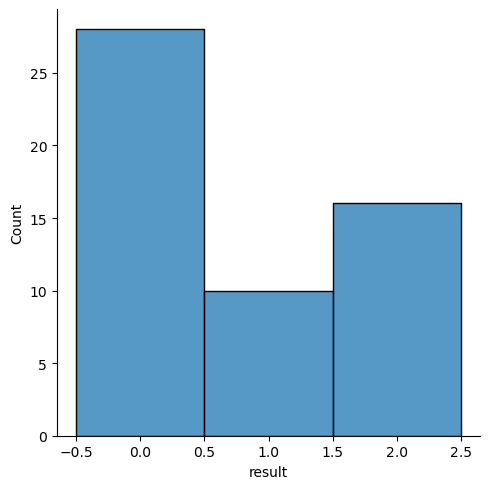

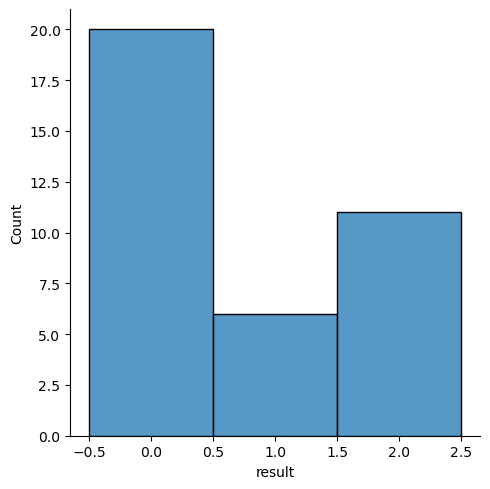

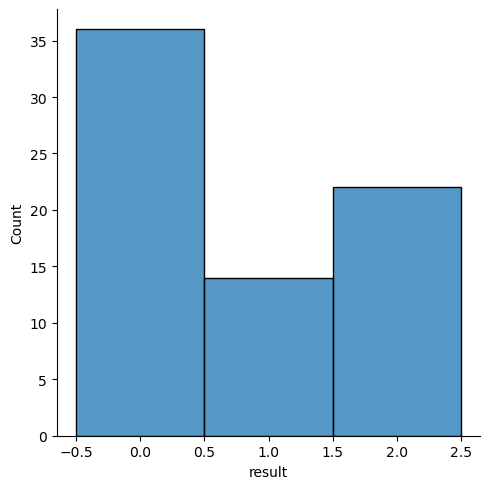

In [377]:
sb.displot(data_team1['result'])
sb.displot(data_team2['result'])
sb.displot(data_team3['result'])

In [306]:
pred = pd.DataFrame(index = range(0,10), columns = ['home_cluster', 'home', 'away_cluster', 'away'])

for i in range(10):
    
    if new_data.iloc[i,0] in team_cluster1:
        pred.iloc[i,1] = int(model_team1.predict(new_data1.iloc[[i]]))
        pred.iloc[i,0] = 1
        
    elif new_data.iloc[i,0] in team_cluster2:
        pred.iloc[i,1] = int(model_team2.predict(new_data2.iloc[[i]]))
        pred.iloc[i,0] = 2
        
    elif new_data.iloc[i,0] in team_cluster3:
        pred.iloc[i,1] = int(model_team3.predict(new_data3.iloc[[i]]))
        pred.iloc[i,0] = 3
        
for i in range(10):
    
    if new_data.iloc[i,1] in team_cluster1:
        pred.iloc[i,3] = int(model_team1.predict(new_data1.iloc[[i]]))
        pred.iloc[i,2] = 1
        
    elif new_data.iloc[i,1] in team_cluster2:
        pred.iloc[i,3] = int(model_team2.predict(new_data2.iloc[[i]]))
        pred.iloc[i,2] = 2
        
    elif new_data.iloc[i,1] in team_cluster3:
        pred.iloc[i,3] = int(model_team3.predict(new_data3.iloc[[i]]))
        pred.iloc[i,2] = 3
        
pred.index = ['ARS vs WOL', 'AVL vs BHA', 'BRE vs MCI', 'CHE vs NEW', 'CRY vs NOT', 'EVE vs BOU', 'LEE vs TOT', 'LEI vs WHU', 'MUN vs FUL', 'SOU vs LIV']
pred['result'] = ['0', '0', '0', '1', '1', '0', '2', '0', '0', '1']
pred

,home_cluster,home,away_cluster,away,result
ARS vs WOL,1,0,3,0,0
AVL vs BHA,3,2,1,2,0
BRE vs MCI,2,2,1,2,0
CHE vs NEW,3,2,1,2,1
CRY vs NOT,3,0,3,0,1
EVE vs BOU,3,0,3,0,0
LEE vs TOT,3,2,2,2,2
LEI vs WHU,3,2,2,0,0
MUN vs FUL,1,0,2,0,0
SOU vs LIV,3,2,1,2,1


In [349]:
model_team1 = RandomForestClassifier(random_state=65, max_depth=1, n_estimators=50)
model_team1.fit(features1_selected, labels1_selected)

model_team2 = RandomForestClassifier(max_depth=1, n_estimators=50)
model_team2.fit(features2_selected, labels2_selected)

model_team3 = RandomForestClassifier(max_depth=1, n_estimators=10)
model_team3.fit(features3_selected, labels3_selected)


RandomForestClassifier(max_depth=1, n_estimators=10)

In [350]:
pred = pd.DataFrame(index = range(0,10), columns = ['home_cluster', 'home_win', 'home_draw', 'home_lose', 'away_cluster', 'away_lose', 'away_draw', 'away_win'])

for i in range(10):
    
    if new_data.iloc[i,0] in team_cluster1:
        pred.iloc[i,1] = model_team1.predict_proba(new_data1.iloc[[i]])[0][0]
        pred.iloc[i,2] = model_team1.predict_proba(new_data1.iloc[[i]])[0][1]
        pred.iloc[i,3] = model_team1.predict_proba(new_data1.iloc[[i]])[0][2]
        pred.iloc[i,0] = 1
        
    elif new_data.iloc[i,0] in team_cluster2:
        pred.iloc[i,1] = model_team2.predict_proba(new_data2.iloc[[i]])[0][0]
        pred.iloc[i,2] = model_team2.predict_proba(new_data2.iloc[[i]])[0][1]
        pred.iloc[i,3] = model_team2.predict_proba(new_data2.iloc[[i]])[0][2]
        pred.iloc[i,0] = 2
        
    elif new_data.iloc[i,0] in team_cluster3:
        pred.iloc[i,1] = model_team3.predict_proba(new_data3.iloc[[i]])[0][0]
        pred.iloc[i,2] = model_team3.predict_proba(new_data3.iloc[[i]])[0][1]
        pred.iloc[i,3] = model_team3.predict_proba(new_data3.iloc[[i]])[0][2]
        pred.iloc[i,0] = 3
        
for i in range(10):
    
    if new_data.iloc[i,1] in team_cluster1:
        pred.iloc[i,5] = model_team1.predict_proba(new_data1.iloc[[i]])[0][0]
        pred.iloc[i,6] = model_team1.predict_proba(new_data1.iloc[[i]])[0][1]
        pred.iloc[i,7] = model_team1.predict_proba(new_data1.iloc[[i]])[0][2]
        pred.iloc[i,4] = 1
        
    elif new_data.iloc[i,1] in team_cluster2:
        pred.iloc[i,5] = model_team2.predict_proba(new_data2.iloc[[i]])[0][0]
        pred.iloc[i,6] = model_team2.predict_proba(new_data2.iloc[[i]])[0][1]
        pred.iloc[i,7] = model_team2.predict_proba(new_data2.iloc[[i]])[0][2]
        pred.iloc[i,4] = 2
        
    elif new_data.iloc[i,1] in team_cluster3:
        pred.iloc[i,5] = model_team3.predict_proba(new_data3.iloc[[i]])[0][0]
        pred.iloc[i,6] = model_team3.predict_proba(new_data3.iloc[[i]])[0][1]
        pred.iloc[i,7] = model_team3.predict_proba(new_data3.iloc[[i]])[0][2]
        pred.iloc[i,4] = 3
        
pred.index = ['ARS vs WOL', 'AVL vs BHA', 'BRE vs MCI', 'CHE vs NEW', 'CRY vs NOT', 'EVE vs BOU', 'LEE vs TOT', 'LEI vs WHU', 'MUN vs FUL', 'SOU vs LIV']
pred['result'] = ['win', 'win', 'win', 'draw', 'draw', 'win', 'lose', 'win', 'win', 'draw']
pred

,home_cluster,home_win,home_draw,home_lose,away_cluster,away_lose,away_draw,away_win,result
ARS vs WOL,1,0.772765,0.1656,0.061635,3,0.672604,0.201632,0.125764,win
AVL vs BHA,3,0.273463,0.190321,0.536216,1,0.369462,0.211929,0.418609,win
BRE vs MCI,2,0.298102,0.196181,0.505717,1,0.18306,0.178754,0.638186,win
CHE vs NEW,3,0.275813,0.21414,0.510048,1,0.254599,0.197732,0.547669,draw
CRY vs NOT,3,0.459732,0.212777,0.327491,3,0.459732,0.212777,0.327491,draw
EVE vs BOU,3,0.456609,0.222417,0.320974,3,0.456609,0.222417,0.320974,win
LEE vs TOT,3,0.230989,0.181379,0.587631,2,0.346162,0.20445,0.449388,lose
LEI vs WHU,3,0.315564,0.197458,0.486977,2,0.622711,0.153826,0.223463,win
MUN vs FUL,1,0.481448,0.213129,0.305424,2,0.612887,0.16757,0.219543,win
SOU vs LIV,3,0.235682,0.214727,0.54959,1,0.261723,0.215559,0.522718,draw


In [365]:
model_team1.coef_

array([[-0.09928171,  0.0945307 , -0.0265197 ,  0.0612936 ,  0.04814575],
       [ 0.03941868, -0.0524278 , -0.06088818,  0.03196055,  0.07361821],
       [ 0.05986303, -0.0421029 ,  0.08740787, -0.09325415, -0.12176396]])

In [170]:
for i in range(5):
    
    train_features, test_features, train_labels, test_labels = train_test_split(features1, labels1, test_size = 0.2)

    logistic_clf = LogisticRegression(C=0.01, class_weight='balanced', multi_class='multinomial', solver='lbfgs')
    logistic_clf.fit(train_features, train_labels)

    logistic_pred = logistic_clf.predict(test_features)

    print("로지스틱 회귀분석 테스트 결과 : ", accuracy_score(test_labels, logistic_pred))

    svm_clf =svm.SVC(kernel = 'linear', C=0.01)
    svm_clf.fit(train_features, train_labels)

    svm_pred = svm_clf.predict(test_features)

    print("svm 테스트 결과               : ", accuracy_score(test_labels, svm_pred))

    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
    rf_clf.fit(train_features, train_labels)

    rf_pred = rf_clf.predict(test_features)

    print("random forest 테스트 결과     : ", accuracy_score(test_labels, rf_pred))

    xgb_dtrain = xgb.DMatrix(data = train_features, label = train_labels) 
    xgb_dtest = xgb.DMatrix(data = test_features) 
    xgb_param = {'max_depth': 10, 
             'learning_rate': 0.01,  
             'objective': 'multi:softmax', 
             'num_class': len(set(train_labels)) + 1} 

    xgb_clf = xgb.train(params = xgb_param, dtrain = xgb_dtrain) 

    xgb_pred = xgb_clf.predict(xgb_dtest) 

    print("XG Boost 테스트 결과          : ", accuracy_score(test_labels, xgb_pred)) 
    print('\n')

로지스틱 회귀분석 테스트 결과 :  0.45454545454545453
svm 테스트 결과               :  0.18181818181818182
random forest 테스트 결과     :  0.45454545454545453
XG Boost 테스트 결과          :  0.45454545454545453


로지스틱 회귀분석 테스트 결과 :  0.45454545454545453
svm 테스트 결과               :  0.6363636363636364
random forest 테스트 결과     :  0.45454545454545453
XG Boost 테스트 결과          :  0.6363636363636364


로지스틱 회귀분석 테스트 결과 :  0.6363636363636364
svm 테스트 결과               :  0.5454545454545454
random forest 테스트 결과     :  0.7272727272727273
XG Boost 테스트 결과          :  0.6363636363636364


로지스틱 회귀분석 테스트 결과 :  0.6363636363636364
svm 테스트 결과               :  0.8181818181818182
random forest 테스트 결과     :  0.5454545454545454
XG Boost 테스트 결과          :  0.5454545454545454


로지스틱 회귀분석 테스트 결과 :  0.8181818181818182
svm 테스트 결과               :  0.45454545454545453
random forest 테스트 결과     :  0.45454545454545453
XG Boost 테스트 결과          :  0.45454545454545453




In [354]:
scaler = StandardScaler()
record3_31 = pd.read_csv("C:/Users/gyoo4/OneDrive/바탕 화면/기록/record_3.31.csv", index_col = 'team_name').drop(['goals','shots', 'goals_from_inside_box', 'headed_clearences'], axis = 1)
index = list(record3_31.index)
column = list(record3_31.columns)
scaler3_31 = scaler.fit_transform(record3_31)
record3_31 = pd.DataFrame(scaler3_31, index=index, columns = column)

game1 = [0] * 22; game2 = [0] * 22; game3 = [0] * 22; game4 = [0] * 22; game5 = [0] * 22
game6 = [0] * 22; game7 = [0] * 22; game8 = [0] * 22; game9 = [0] * 22; game10 = [0] * 22

for i in range(21):
    
    if variable_KMeans['cluster'][i] == 1:
        game1[i] = (1 + home_weight.loc['Bournemouth']['weight']) * record3_31.loc['Bournemouth'].to_list()[i] - record3_31.loc['Fulham'].to_list()[i]
        game2[i] = (1 + home_weight.loc['Manchester City']['weight']) * record3_31.loc['Manchester City'].to_list()[i] - record3_31.loc['Liverpool'].to_list()[i]
        game3[i] = (1 + home_weight.loc['Arsenal']['weight']) * record3_31.loc['Arsenal'].to_list()[i] - record3_31.loc['Leeds United'].to_list()[i]
        game4[i] = (1 + home_weight.loc['Brighton & Hove Albion']['weight']) * record3_31.loc['Brighton & Hove Albion'].to_list()[i] - record3_31.loc['Brentford'].to_list()[i]
        game5[i] = (1 + home_weight.loc['Crystal Palace']['weight']) * record3_31.loc['Crystal Palace'].to_list()[i] - record3_31.loc['Leicester City'].to_list()[i]
        game6[i] = (1 + home_weight.loc['Nottingham Forest']['weight']) * record3_31.loc['Nottingham Forest'].to_list()[i] - record3_31.loc['Wolverhampton Wanderers'].to_list()[i]
        game7[i] = (1 + home_weight.loc['Chelsea']['weight']) * record3_31.loc['Chelsea'].to_list()[i] - record3_31.loc['Aston Villa'].to_list()[i]
        game8[i] = (1 + home_weight.loc['West Ham United']['weight']) * record3_31.loc['West Ham United'].to_list()[i] - record3_31.loc['Southampton'].to_list()[i]
        game9[i] = (1 + home_weight.loc['Newcastle United']['weight']) * record3_31.loc['Newcastle United'].to_list()[i] - record3_31.loc['Manchester United'].to_list()[i]
        game10[i] = (1 + home_weight.loc['Everton']['weight']) * record3_31.loc['Everton'].to_list()[i] - record3_31.loc['Tottenham Hotspur'].to_list()[i]
    else:
        game1[i] = (1 - home_weight.loc['Bournemouth']['weight']) * record3_31.loc['Bournemouth'].to_list()[i] - record3_31.loc['Fulham'].to_list()[i]
        game2[i] = (1 - home_weight.loc['Manchester City']['weight']) * record3_31.loc['Manchester City'].to_list()[i] - record3_31.loc['Liverpool'].to_list()[i]
        game3[i] = (1 - home_weight.loc['Arsenal']['weight']) * record3_31.loc['Arsenal'].to_list()[i] - record3_31.loc['Leeds United'].to_list()[i]
        game4[i] = (1 - home_weight.loc['Brighton & Hove Albion']['weight']) * record3_31.loc['Brighton & Hove Albion'].to_list()[i] - record3_31.loc['Brentford'].to_list()[i]
        game5[i] = (1 - home_weight.loc['Crystal Palace']['weight']) * record3_31.loc['Crystal Palace'].to_list()[i] - record3_31.loc['Leicester City'].to_list()[i]
        game6[i] = (1 - home_weight.loc['Nottingham Forest']['weight']) * record3_31.loc['Nottingham Forest'].to_list()[i] - record3_31.loc['Wolverhampton Wanderers'].to_list()[i]
        game7[i] = (1 - home_weight.loc['Chelsea']['weight']) * record3_31.loc['Chelsea'].to_list()[i] - record3_31.loc['Aston Villa'].to_list()[i]
        game8[i] = (1 - home_weight.loc['West Ham United']['weight']) * record3_31.loc['West Ham United'].to_list()[i] - record3_31.loc['Southampton'].to_list()[i]
        game9[i] = (1 - home_weight.loc['Newcastle United']['weight']) * record3_31.loc['Newcastle United'].to_list()[i] - record3_31.loc['Manchester United'].to_list()[i]
        game10[i] = (1 - home_weight.loc['Everton']['weight']) * record3_31.loc['Everton'].to_list()[i] - record3_31.loc['Tottenham Hotspur'].to_list()[i]

game1[21] = against_matrix.loc['Bournemouth','Fulham']
game2[21] = against_matrix.loc['Manchester City','Liverpool']
game3[21] = against_matrix.loc['Arsenal','Leeds United']
game4[21] = against_matrix.loc['Brighton & Hove Albion','Brentford']
game5[21] = against_matrix.loc['Crystal Palace','Leicester City']
game6[21] = against_matrix.loc['Nottingham Forest','Wolverhampton Wanderers']
game7[21] = against_matrix.loc['Chelsea','Aston Villa']
game8[21] = against_matrix.loc['West Ham United','Southampton']
game9[21] = against_matrix.loc['Newcastle United','Manchester United']
game10[21] = against_matrix.loc['Everton','Tottenham Hotspur']

game1.insert(0, 'Bournemouth'); game2.insert(0, 'Manchester City'); game3.insert(0, 'Arsenal'); game4.insert(0, 'Brighton & Hove Albion'); game5.insert(0, 'Crystal Palace')
game6.insert(0, 'Nottingham Forest'); game7.insert(0, 'Chelsea'); game8.insert(0, 'West Ham United'); game9.insert(0, 'Newcastle United'); game10.insert(0, 'Everton')

game1.insert(1, 'Fulham');game2.insert(1, 'Liverpool');game3.insert(1, 'Leeds United');game4.insert(1, 'Brentford');game5.insert(1, 'Leicester City')
game6.insert(1, 'Wolverhampton Wanderers');game7.insert(1, 'Aston Villa');game8.insert(1, 'Southampton');game9.insert(1, 'Manchester United');game10.insert(1, 'Tottenham Hotspur')

game1.insert(2, 0); game2.insert(2, 0); game3.insert(2, 0); game4.insert(2, 1); game5.insert(2, 0)
game6.insert(2, 1); game7.insert(2, 2); game8.insert(2, 0); game9.insert(2, 0); game10.insert(2, 1) #승 0, 무 1, 패 2


stat_total = stat1 + stat2 + stat3 + stat4

stat_total.insert(0,'home_team')
stat_total.insert(1,'away_team')
stat_total.insert(2,'result')
stat_total.append('relative_record')
stat_total.remove('goals'); stat_total.remove('shots'); stat_total.remove('goals_from_inside_box'); stat_total.remove('headed_clearences')

with open('C:/Users/gyoo4/OneDrive/바탕 화면/기록/result.csv', 'w') as result:
    writer = csv.writer(result)
    writer.writerow(stat_total)
    writer.writerow(game1)
    writer.writerow(game2)
    writer.writerow(game3)
    writer.writerow(game4)
    writer.writerow(game5)
    writer.writerow(game6)
    writer.writerow(game7)
    writer.writerow(game8)
    writer.writerow(game9)
    writer.writerow(game10)


## 결론 및 향후 방향

- 득점력이 높은 팀이 상위권에 포진하는 경향이 뚜렷하게 나타났습니다.
- 향후에는 선수별 데이터 또는 시계열 경기 데이터를 활용하여 더 정밀한 분석이 가능할 것입니다.
